In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
object_col = []
for i in range(len(train.columns)):
    if train[train.columns[i]].dtype == "O":
        object_col.append(train.columns[i])

print(object_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [27]:
rgn = setup(train, target="SalePrice", ignore_features=["ID"])
best_model = compare_models(sort='RMSE')

,Description,Value
0,Session id,6094
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 280)"
5,Transformed train set shape,"(1021, 280)"
6,Transformed test set shape,"(439, 280)"
7,Ignore features,1
8,Ordinal features,4
9,Numeric features,37


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15694.7958,829679021.4490,27638.4041,0.8815,0.1275,0.0889,0.7900
gbr,Gradient Boosting Regressor,17385.5599,936626536.3949,29437.2682,0.8644,0.1403,0.1008,0.0910
et,Extra Trees Regressor,18466.9771,976771111.7895,30369.4867,0.8579,0.1498,0.1085,0.1840
xgboost,Extreme Gradient Boosting,19153.4547,1051736981.9962,31274.7948,0.8489,0.1504,0.1099,0.1420
rf,Random Forest Regressor,19078.3313,1079216449.9513,31700.1324,0.8418,0.1530,0.1112,0.1780
lasso,Lasso Regression,19505.6468,1544310485.1004,35071.1475,0.7700,0.2095,0.1183,0.0750
ridge,Ridge Regression,20186.6232,1539009078.7197,35955.4895,0.7699,0.2032,0.1190,0.0420
lr,Linear Regression,20165.1821,1678930013.1168,36751.1068,0.7489,0.2791,0.1226,0.0480
ada,AdaBoost Regressor,24882.1177,1462019304.3640,37163.8593,0.7828,0.2042,0.1622,0.0640
llar,Lasso Least Angle Regression,20420.7575,1647140724.7222,37193.2538,0.7547,0.1768,0.1207,0.0420


In [28]:
cbr = create_model('catboost', verbose=False)

In [29]:
tuned_cbr = tune_model(cbr, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21016.8628,1866682094.8716,43205.1165,0.7030,0.2114,0.1477
1,15164.5641,671761375.9175,25918.3598,0.9161,0.1016,0.0774
2,23041.3252,2068736458.6971,45483.3646,0.8084,0.1711,0.1191
3,15548.6844,654915313.1775,25591.3132,0.8801,0.1438,0.1008
4,15195.5710,486343167.2541,22053.1895,0.8946,0.1026,0.0802
5,14782.8010,1144894332.6265,33836.2872,0.8669,0.1332,0.0857
6,18083.5856,932895139.4756,30543.3322,0.8914,0.1136,0.0855
7,13721.8457,346338877.2561,18610.1821,0.9051,0.1129,0.0820
8,12867.3393,323554063.4610,17987.6086,0.9388,0.1020,0.0742


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


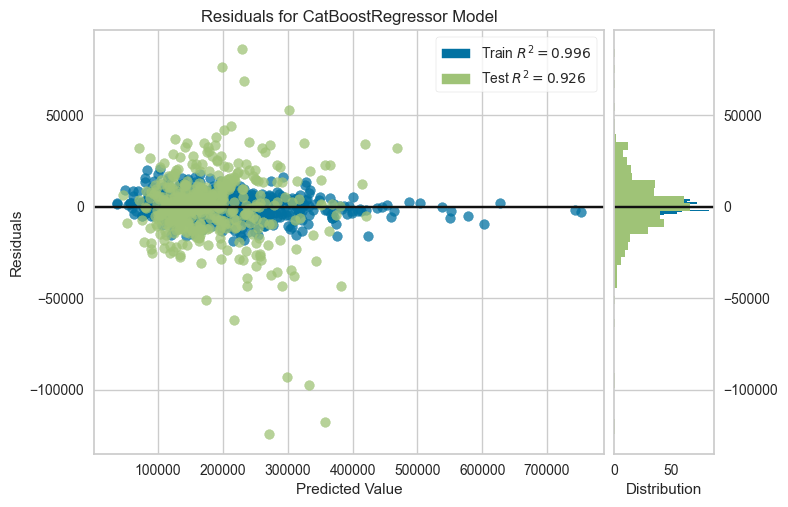

In [30]:
plot_model(tuned_cbr)

In [31]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,12922.3772,387785434.0361,19692.2684,0.9257,0.1059,0.0761


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
109,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000,200620.644254
1370,1371,50,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,105000,108410.381193
1277,1278,80,RL,NaN,17871,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,197900,197985.287411
138,139,60,RL,73.0,9066,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdPrv,NaN,0,12,2008,WD,Normal,230000,250007.567282
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,10,2009,WD,Normal,105000,100300.012257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2007,New,Partial,311872,274770.376056
877,878,60,RL,74.0,8834,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,350000,350899.610014
990,991,60,RL,82.0,9452,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,348000,309867.367977
983,984,60,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,255900,257890.743341


In [32]:
final_cbr = finalize_model(best_model)

In [43]:
test_predictions = predict_model(final_cbr, data=test)
submission = test_predictions[['Id', 'prediction_label']]
submission.columns = ['Id', 'SalePrice']
submission.to_csv('submission.csv', index=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,prediction_label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,123775.814970
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,164081.685615
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,187137.480842
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,191689.742887
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,181637.749229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,81734.363942
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,77064.122491
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,170780.507160
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,116801.628156
